In [1]:
import TIVlib as tiv
import numpy as np

In [2]:
from essentia.standard import MonoLoader, Windowing, Spectrum, SpectralPeaks, FrameGenerator, HPCP

def file_to_hpcp(filename):
    audio = MonoLoader(filename=filename)()
    windowing = Windowing(type='blackmanharris62')
    spectrum = Spectrum()
    spectral_peaks = SpectralPeaks(orderBy='magnitude',
                                    magnitudeThreshold=0.001,
                                    maxPeaks=20,
                                    minFrequency=20,
                                    maxFrequency=8000)
    hpcp = HPCP(maxFrequency=8000)#,
                #normalized='unitSum') #VERIFICAR QUE ISTO E O Q FAZ SENTIDO FAZER

    spec_group = []
    hpcp_group = []


    for frame in FrameGenerator(audio,frameSize=1024,hopSize=512):
        windowed = windowing(frame)
        fft = spectrum(windowed)
        frequencies, magnitudes = spectral_peaks(fft)
        final_hpcp = hpcp(frequencies, magnitudes)
  
        spec_group.append(fft)
        hpcp_group.append(final_hpcp)
    
    mean_hpcp = np.mean(np.array(hpcp_group).T, axis = 1)
    return mean_hpcp


In [3]:
import librosa

def file_to_chroma(filename):
    audio = librosa.core.load(filename)
    chromagram = librosa.feature.chroma_stft(audio)
    print (chromagram)
    mean_chromagram = np.mean(chromagram,axis = 0)
    return mean_chromagram
    

In [4]:
#Reference: CMaj chord
c_maj = "./audio_files/149282__strever953__rhythmguitar-cmaj-p105.wav"
#Consonant chords: GMaj, Amin
g_maj = "./audio_files/109999__keider__gmaj-5th-position.wav"
a_min = "./audio_files/8455__speedy__amin-full.wav"
#Dissonant chords: C#Maj, D#min
c_sharp_maj = "./audio_files/47848__godlesswonder__c-sharp-maj.wav"
d_sharp_min = "./audio_files/47862__godlesswonder__d-sharp-min.wav"

#Calculate the HPCP for each of the chords
c_maj_hpcp = file_to_hpcp(c_maj)
g_maj_hpcp = file_to_hpcp(g_maj)
a_min_hpcp = file_to_hpcp(a_min)
c_sharp_maj_hpcp = file_to_hpcp(c_sharp_maj)
d_sharp_min_hpcp = file_to_hpcp(d_sharp_min)

#Calculate the TIV for each HPCP
c_maj_tiv = tiv.TIV.from_pcp(c_maj_hpcp)
g_maj_tiv = tiv.TIV.from_pcp(g_maj_hpcp)
a_min_tiv = tiv.TIV.from_pcp(a_min_hpcp)
c_sharp_maj_tiv = tiv.TIV.from_pcp(c_sharp_maj_hpcp)
d_sharp_min_tiv = tiv.TIV.from_pcp(d_sharp_min_hpcp)


In [5]:
#Examples on the magnitude and phase features
print("CMaj TIV.mag")
print(tiv.mag.mags(c_maj_tiv))
print("TIV weights")
print(tiv.TIV.weights)
print("CMaj TIV.phases")
print(tiv.phases(c_maj_tiv))
print("CMaj diatonicity")
print(tiv.mag.diatonicity(c_maj_tiv))
print("CMaj wholetoneness")
print(tiv.mag.wholetoneness(c_maj_tiv))
print("CMaj chromaticity")
print(tiv.mag.chromaticity(c_maj_tiv))

CMaj TIV.mag
[0.56551284 1.51737116 1.88691636 3.66442848 2.17161312 1.25930228]
TIV weights
[3, 8, 11.5, 15, 14.5, 7.5]
CMaj TIV.phases
[ 1.12029624 -2.8503086   2.98669442  2.39079654  0.08186771  0.        ]
CMaj diatonicity
0.14976642228434311
CMaj wholetoneness
0.1679069702336124
CMaj chromaticity
0.1885042792559685


In [6]:
#Example on extracting keys
#Values are not the same as before
print("CMaj from Temperley profiles and the Shaath")
print(tiv.key(c_maj_tiv, mode='temperley'))
print(tiv.key(c_maj_tiv, mode='shaath'))
print("GMaj from Temperley profiles and the Shaath")
print(tiv.key(g_maj_tiv, mode='temperley'))
print(tiv.key(g_maj_tiv, mode='shaath'))
print("Amin from Temperley profiles and the Shaath")
print(tiv.key(a_min_tiv, mode='temperley'))
print(tiv.key(a_min_tiv, mode='shaath'))
print("C#Maj from Temperley profiles and the Shaath")
print(tiv.key(c_sharp_maj_tiv, mode='temperley'))
print(tiv.key(c_sharp_maj_tiv, mode='shaath'))
print("D#min from Temperley profiles and the Shaath")
print(tiv.key(d_sharp_min_tiv, mode='temperley'))
print(tiv.key(d_sharp_min_tiv, mode='shaath'))

CMaj from Temperley profiles and the Shaath
('d', 'min')
('g', 'min')
GMaj from Temperley profiles and the Shaath
('bb', 'min')
('bb', 'min')
Amin from Temperley profiles and the Shaath
('c', 'maj')
('c', 'maj')
C#Maj from Temperley profiles and the Shaath
('eb', 'min')
('ab', 'min')
D#min from Temperley profiles and the Shaath
('bb', 'min')
('gb', 'min')


In [7]:
#Example on combining sounds and evaluate its dissonance
combined_GM = tiv.combine(c_maj_tiv, g_maj_tiv)
combined_Am = tiv.combine(c_maj_tiv, a_min_tiv)
combined_CSM = tiv.combine(c_maj_tiv, c_sharp_maj_tiv)
combined_DSm = tiv.combine(c_maj_tiv, d_sharp_min_tiv)

print("Dissonance CMaj + GMaj")
print(tiv.dissonance(combined_GM))
print("Dissonance CMaj + Amin")
print(tiv.dissonance(combined_Am))
print("Dissonance CMaj + C#Maj")
print(tiv.dissonance(combined_CSM))
print("Dissonance CMaj + D#min")
print(tiv.dissonance(combined_DSm))

Dissonance CMaj + GMaj
0.795977439757471
Dissonance CMaj + Amin
0.7996018849508947
Dissonance CMaj + C#Maj
0.863371569918294
Dissonance CMaj + D#min
0.9067660677290184


In [8]:
#Example on calculating the distances between sounds
print("Euclidean and cosine distance between CMaj and GMaj")
print(tiv.distances.euclidean(c_maj_tiv,g_maj_tiv))
print(tiv.distances.cosine(c_maj_tiv,g_maj_tiv))

print("Euclidean and cosine distance between CMaj and AMin")
print(tiv.distances.euclidean(c_maj_tiv,a_min_tiv))
print(tiv.distances.cosine(c_maj_tiv,a_min_tiv))

print("Euclidean and cosine distance between CMaj and C#Maj")
print(tiv.distances.euclidean(c_maj_tiv,c_sharp_maj_tiv))
print(tiv.distances.cosine(c_maj_tiv,c_sharp_maj_tiv))

print("Euclidean and cosine distance between CMaj and D#min")
print(tiv.distances.euclidean(c_maj_tiv,d_sharp_min_tiv))
print(tiv.distances.cosine(c_maj_tiv,d_sharp_min_tiv))


Euclidean and cosine distance between CMaj and GMaj
8.920390652512383
1.3089079886766202
Euclidean and cosine distance between CMaj and AMin
20.030842685142055
1.7762568705724326
Euclidean and cosine distance between CMaj and C#Maj
5.916414793890325
1.355912999342637
Euclidean and cosine distance between CMaj and D#min
7.81641512070811
2.0049954793886138


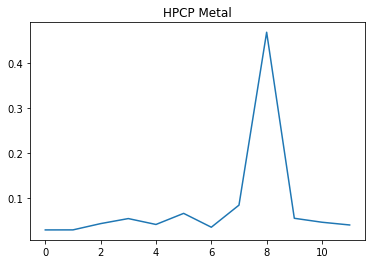

/home/aframires/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


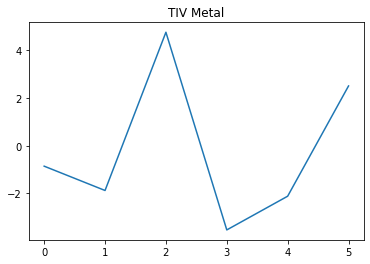

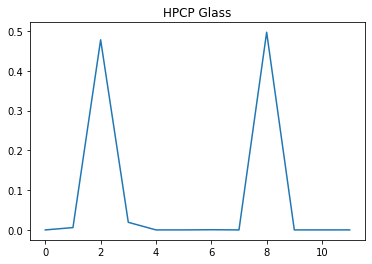

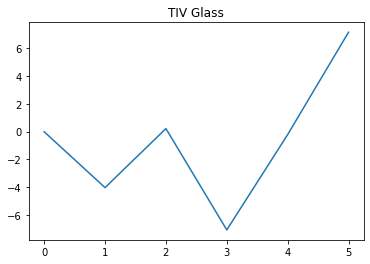

tiv.mag: [ 0.0220785   7.89372815  0.26226169 14.42813166  0.59960706  7.12468006]
tiv.phases: [-2.2928869  -2.10561931  0.62316499  2.08204292 -1.94468129  0.        ]
tiv.diatonicity: 0.041352211011223515
tiv.wholetoneness: 0.9499573412048802
tiv.chromacity: 0.007359499029499668
tiv.phases: [-2.2928869  -2.10561931  0.62316499  2.08204292 -1.94468129  0.        ]
tiv.dissonance: 0.3205335780471672
tiv.key(temperley): ('C', 'maj')
tiv.key(shaath): ('ab', 'min')
tiv.distances.euclidean: 12.334060476980932
tiv.distances.cosine: 0.7393358169379687


In [10]:
#Testing

%matplotlib inline
import matplotlib.pyplot as plt



metal = "./audio_files/metal.wav"
glass = "./audio_files/glass.wav"

metal_hpcp = file_to_hpcp(metal)
glass_hpcp = file_to_hpcp(glass)

metal_tiv = tiv.TIV.from_pcp(metal_hpcp)
glass_tiv = tiv.TIV.from_pcp(glass_hpcp)

plt.figure(1)
plt.title('HPCP Metal')
plt.plot(metal_hpcp/np.sum(metal_hpcp))
plt.show()

plt.figure(2)
plt.title('TIV Metal')
plt.plot(metal_tiv.vector)
plt.show()

plt.figure(3)
plt.title('HPCP Glass')
plt.plot(glass_hpcp/np.sum(glass_hpcp))
plt.show()

plt.figure(4)
plt.title('TIV Glass')
plt.plot(glass_tiv.vector)
plt.show()

print("tiv.mag: " + str(tiv.mag.mags(glass_tiv)))
print("tiv.phases: " + str(tiv.phases(glass_tiv)))
print("tiv.diatonicity: " + str(tiv.mag.diatonicity(glass_tiv)))
print("tiv.wholetoneness: " + str(tiv.mag.wholetoneness(glass_tiv)))
print("tiv.chromacity: " + str(tiv.mag.chromaticity(glass_tiv)))
print("tiv.phases: " + str(tiv.phases(glass_tiv)))
print("tiv.dissonance: " + str(tiv.dissonance(glass_tiv)))
print("tiv.key(temperley): " + str(tiv.key(glass_tiv)))
print("tiv.key(shaath): " + str(tiv.key(glass_tiv,mode='shaath')))
print("tiv.distances.euclidean: " + str(tiv.distances.euclidean(glass_tiv, metal_tiv)))
print("tiv.distances.cosine: " + str(tiv.distances.cosine(glass_tiv, metal_tiv)))